# Using Multiple Layers

It is common that we want to create our maps from mutliple layers, both raster and vector and therefore this notebook will show an example of doing that for a set of Global Mangrove Watch loss alerts for a region in Guinea-Bissau.


## Load Modules

In [1]:
%matplotlib inline
import geopandas
import matplotlib.cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import rsgislib.tools.mapping

## Specify File Paths

In [2]:
vec_alerts_file = "../data/gmw/gmw_loss_alerts_utm.geojson"
vec_gmw_ext_file = "../data/gmw/gmw_2018_ext_alerts.geojson"
landsat_img = "../data/gmw/landsat_2023_gmw_alerts.tif"

## Loads Vector Data

In [3]:
gmw_alerts_gdf = geopandas.read_file(vec_alerts_file)
gmw_2018_ext_gdf = geopandas.read_file(vec_gmw_ext_file)

### Check Layer Projections

It is important to note that the all the datasets being combined within a plot need to have the same projection.  

In [4]:
gmw_alerts_gdf.crs

<Projected CRS: EPSG:32628>
Name: WGS 84 / UTM zone 28N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°W and 12°W, northern hemisphere between equator and 84°N, onshore and offshore. Gambia. Greenland. Guinea. Guinea-Bissau. Iceland. Ireland - offshore Porcupine Basin. Mauritania. Morocco. Senegal. Sierra Leone. Western Sahara.
- bounds: (-18.0, 0.0, -12.0, 84.0)
Coordinate Operation:
- name: UTM zone 28N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gmw_2018_ext_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
rsgislib.imageutils.get_wkt_proj_from_img(landsat_img)

'PROJCS["WGS 84 / UTM zone 28N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32628"]]'

### Reproject

In this case we can see that the GMW alerts and GMW extent layer have different projections. As the Landsat image we will use for the analysis is in UTM WGS84 28N (EPSG:32628) matching the alerts vector file we will reproject the GMW extent vector, we can do this using Geopandas.

In [7]:
gmw_2018_ext_utm_gdf = gmw_2018_ext_gdf.to_crs(epsg=32628)

In [8]:
gmw_2018_ext_utm_gdf.crs

<Projected CRS: EPSG:32628>
Name: WGS 84 / UTM zone 28N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°W and 12°W, northern hemisphere between equator and 84°N, onshore and offshore. Gambia. Greenland. Guinea. Guinea-Bissau. Iceland. Ireland - offshore Porcupine Basin. Mauritania. Morocco. Senegal. Sierra Leone. Western Sahara.
- bounds: (-18.0, 0.0, -12.0, 84.0)
Coordinate Operation:
- name: UTM zone 28N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Create Map with All Layers

Image Data Size: 217 x 187
Image Data Size: 217 x 187


Text(0.5, 1.0, 'Only Landsat')

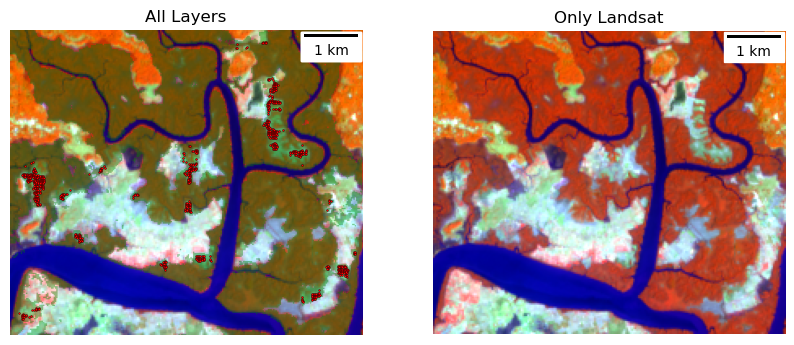

In [9]:
bbox = [460000, 466500, 1245102, 1250726]

# Create a plot using the matplotlib library
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    landsat_img,
    img_bands=[5, 6, 4],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=bbox,
    show_map_axis=False,
)
rsgislib.tools.mapping.create_vec_lyr_map(
    ax1,
    gmw_2018_ext_utm_gdf,
    bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
    show_map_axis=False,
)
rsgislib.tools.mapping.create_vec_lyr_map(
    ax1,
    gmw_alerts_gdf,
    bbox,
    vec_fill_clrs="red",
    vec_markersize=2,
    show_map_axis=False,
)
ax1.set_title("All Layers")

rsgislib.tools.mapping.create_raster_img_map(
    ax2,
    landsat_img,
    img_bands=[5, 6, 4],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=bbox,
    show_map_axis=False,
)
ax2.set_title("Only Landsat")

## Create Choropleth Map

Colouring the features by an attribute is an important aspect of creating a map, the `rsgislib.tools.mapping.create_choropleth_vec_lyr_map` function can be used to do that. 

In [10]:
# Use the head function to add the column headings and first few rows:
gmw_alerts_gdf.head()

,fid,score,firstobsyear,firstobsmonth,firstobsday,first_obs_date,scr5obsyear,scr5obsmonth,scr5obsday,scr5_obs_date,...,rm_qa,lastobsyear,lastobsmonth,lastobsday,last_obs_date,confident,created_at,uid,id,geometry
0,564,5,2019,1,31,2019-01-31,2019,1,31,2019-01-31,...,False,2019,1,31,2019-01-31,5,2023-02-10 07:51:36,564,564,POINT (464173.198 1250398.392)
1,565,5,2019,1,31,2019-01-31,2019,1,31,2019-01-31,...,False,2019,1,31,2019-01-31,5,2023-02-10 07:51:36,565,565,POINT (464195.024 1250398.368)
2,567,5,2019,1,31,2019-01-31,2019,1,31,2019-01-31,...,False,2019,1,31,2019-01-31,5,2023-02-10 07:51:36,567,567,POINT (462271.104 1247658.335)
3,568,5,2019,1,31,2019-01-31,2019,1,31,2019-01-31,...,False,2019,1,31,2019-01-31,5,2023-02-10 07:51:36,568,568,POINT (462271.078 1247636.220)
4,569,5,2019,1,31,2019-01-31,2019,1,31,2019-01-31,...,False,2019,1,31,2019-01-31,5,2023-02-10 07:51:36,569,569,POINT (460172.964 1245515.731)


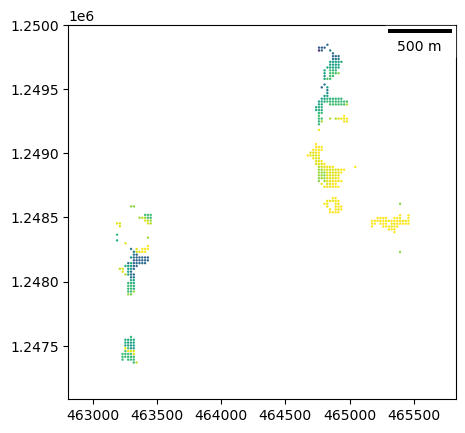

In [11]:
bbox = [462810, 465829, 1247083, 1250000]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=bbox,
    vec_markersize=3,
    vec_line_width=0,
)

This uses the default colour bar, lets specify our own. 

### Use our own colour bar

2019-01-31 00:00:00 -- 2022-05-31 00:00:00


/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/3048654580.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  vec_fill_cmap = matplotlib.cm.get_cmap("jet")


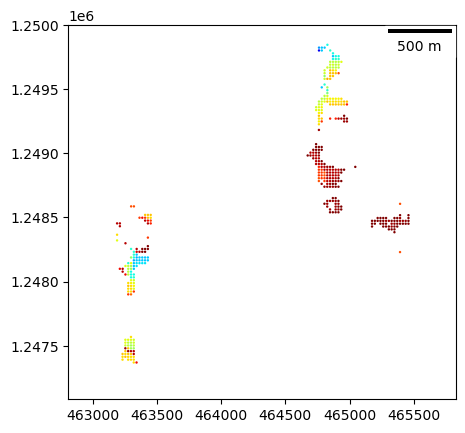

In [12]:
bbox = [462810, 465829, 1247083, 1250000]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

min_val = gmw_alerts_gdf["first_obs_date"].min()
max_val = gmw_alerts_gdf["first_obs_date"].max()

print(f"{min_val} -- {max_val}")

vec_fill_cmap = matplotlib.cm.get_cmap("jet")
vec_var_norm = None

rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=3,
    vec_line_width=0,
)

### Add a colour bar to figure

It is important to tell the user of the map what the colours relate to, we therefore need to add a colour bar:

2019-01-31 00:00:00 -- 2022-05-31 00:00:00


/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/1297406692.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  vec_fill_cmap = matplotlib.cm.get_cmap("jet")
/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/1297406692.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])


[Text(0.0, 0, '2019'),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '2022')]

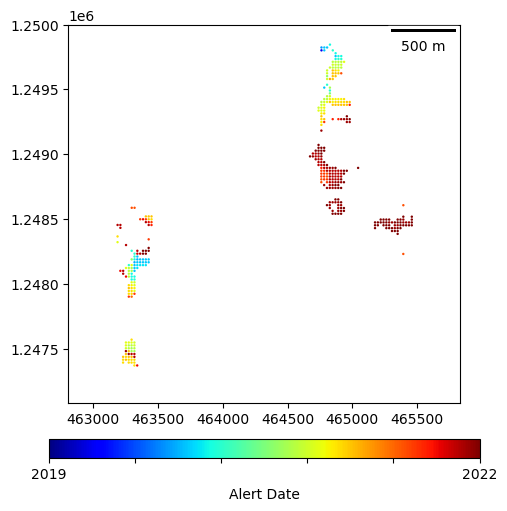

In [13]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)  #
gspec = gridspec.GridSpec(
    ncols=1, nrows=2, height_ratios=[1, 0.05], width_ratios=[1], figure=fig
)
gspec.update(wspace=0.05, hspace=0.05)  # set the spacing between axes.

ax01 = fig.add_subplot(gspec[0, 0])

min_val = gmw_alerts_gdf["first_obs_date"].min()
max_val = gmw_alerts_gdf["first_obs_date"].max()

print(f"{min_val} -- {max_val}")

vec_fill_cmap = matplotlib.cm.get_cmap("jet")
vec_var_norm = None

rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax01,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=3,
    vec_line_width=0,
)

cbax = fig.add_subplot(gspec[1, 0])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=vec_var_norm, cmap=vec_fill_cmap),
    cax=cbax,
    orientation="horizontal",
    ticklocation="bottom",
    label="Alert Date",
)

cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])

## Redo Our Map

2019-01-31 00:00:00 -- 2022-05-31 00:00:00


/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/3145765993.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  vec_fill_cmap = matplotlib.cm.get_cmap("jet")
/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/3145765993.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])


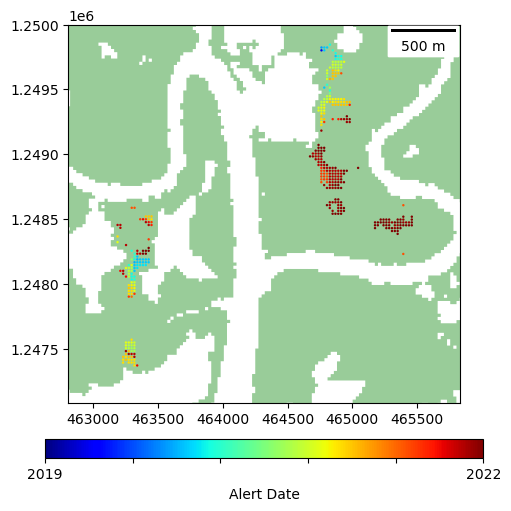

In [14]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)  #
gspec = gridspec.GridSpec(
    ncols=1, nrows=2, height_ratios=[1, 0.05], width_ratios=[1], figure=fig
)
gspec.update(wspace=0.05, hspace=0.05)  # set the spacing between axes.

ax01 = fig.add_subplot(gspec[0, 0])

min_val = gmw_alerts_gdf["first_obs_date"].min()
max_val = gmw_alerts_gdf["first_obs_date"].max()

print(f"{min_val} -- {max_val}")

vec_fill_cmap = matplotlib.cm.get_cmap("jet")
vec_var_norm = None

rsgislib.tools.mapping.create_vec_lyr_map(
    ax01,
    gmw_2018_ext_utm_gdf,
    bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)

rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax01,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=3,
    vec_line_width=0,
)

cbax = fig.add_subplot(gspec[1, 0])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=vec_var_norm, cmap=vec_fill_cmap),
    cax=cbax,
    orientation="horizontal",
    ticklocation="bottom",
    label="Alert Date",
)

cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])
plt.savefig("gmw_alerts_example.png")

## Now try a fancy example...

/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/2900705764.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  vec_fill_cmap = matplotlib.cm.get_cmap("jet")


Image Data Size: 217 x 187


/var/folders/rq/rrjbs1qs2f52j6hv3g0gyvkm0000gq/T/ipykernel_76926/2900705764.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])


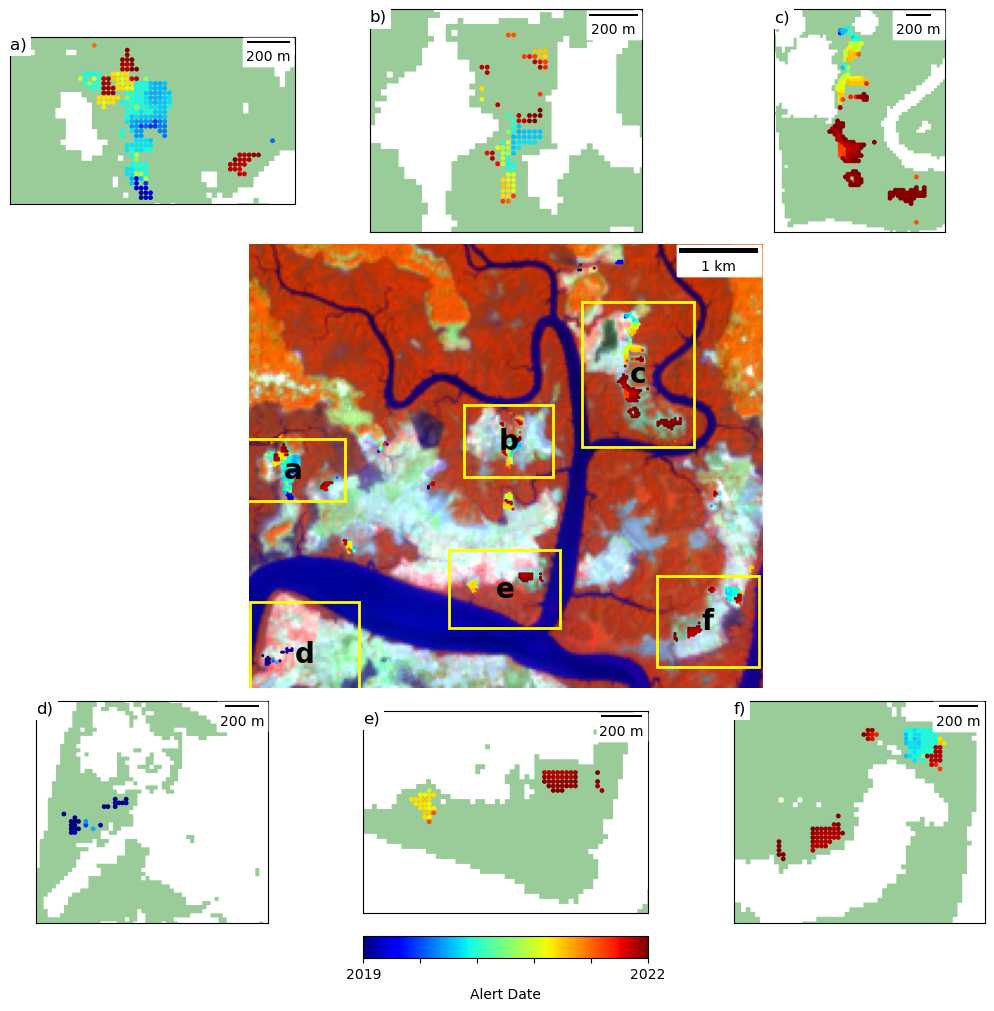

In [15]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)  #
gspec = gridspec.GridSpec(
    ncols=3,
    nrows=4,
    height_ratios=[0.5, 1, 0.5, 0.05],
    width_ratios=[1, 1, 1],
    figure=fig,
)
gspec.update(wspace=0.05, hspace=0.05)  # set the spacing between axes.

vec_fill_cmap = matplotlib.cm.get_cmap("jet")
vec_var_norm = None

###################################################
# Start ROW 1
###################################################
ax_00 = fig.add_subplot(gspec[0, 0])
sub1_bbox = [459893, 461217, 1247476, 1248253]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_00,
    gmw_2018_ext_utm_gdf,
    bbox=sub1_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_00,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub1_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_00.set_xticks([])
ax_00.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_00, "a)")
###################################################

###################################################
ax_01 = fig.add_subplot(gspec[0, 1])
sub2_bbox = [462726, 463849, 1247776, 1248692]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_01,
    gmw_2018_ext_utm_gdf,
    bbox=sub2_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_01,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub2_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_01.set_xticks([])
ax_01.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_01, "b)")
###################################################

###################################################
ax_02 = fig.add_subplot(gspec[0, 2])
sub3_bbox = [464210, 465630, 1248153, 1249996]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_02,
    gmw_2018_ext_utm_gdf,
    bbox=sub3_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_02,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub3_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_02.set_xticks([])
ax_02.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_02, "c)")
###################################################
# End ROW 1
###################################################


# ROW 2: Landsat


###################################################
# Start ROW 3
###################################################
ax_20 = fig.add_subplot(gspec[2, 0])
sub4_bbox = [460009, 461391, 1244866, 1246190]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_20,
    gmw_2018_ext_utm_gdf,
    bbox=sub4_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_20,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub4_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_20.set_xticks([])
ax_20.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_20, "d)")
###################################################

###################################################
ax_21 = fig.add_subplot(gspec[2, 1])
sub5_bbox = [462535, 463938, 1245861, 1246853]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_21,
    gmw_2018_ext_utm_gdf,
    bbox=sub5_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_21,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub5_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_21.set_xticks([])
ax_21.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_21, "e)")
###################################################

###################################################
ax_22 = fig.add_subplot(gspec[2, 2])
sub6_bbox = [465158, 466451, 1245378, 1246523]
rsgislib.tools.mapping.create_vec_lyr_map(
    ax_22,
    gmw_2018_ext_utm_gdf,
    bbox=sub6_bbox,
    vec_fill_clrs="green",
    vec_line_widths=0,
    vec_fill_alphas=0.4,  # make GMW extent transparent
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_22,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=sub6_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=12,
    vec_line_width=0,
)
ax_22.set_xticks([])
ax_22.set_yticks([])
rsgislib.tools.mapping.add_axis_label(ax_22, "f)")
###################################################
# End ROW 2
###################################################

###################################################
ax_1 = fig.add_subplot(gspec[1, :])
ls_bbox = [460000, 466500, 1245102, 1250726]
rsgislib.tools.mapping.create_raster_img_map(
    ax_1,
    landsat_img,
    img_bands=[5, 6, 4],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=ls_bbox,
)
rsgislib.tools.mapping.create_choropleth_vec_lyr_map(
    ax_1,
    gp_vec=gmw_alerts_gdf,
    vec_col="first_obs_date",
    bbox=ls_bbox,
    vec_fill_cmap=vec_fill_cmap,
    vec_var_norm=vec_var_norm,
    vec_markersize=5,
    vec_line_width=0,
    show_map_axis=False,
)
rsgislib.tools.mapping.draw_bboxes_to_axis(
    ax_1,
    bboxes=[sub1_bbox, sub2_bbox, sub3_bbox, sub4_bbox, sub5_bbox, sub6_bbox],
    bbox_labels=["a", "b", "c", "d", "e", "f"],
    rect_clr="yellow",
    line_width=2,
    lbl_font_size=20,
    lbl_font_weight="bold",
)
###################################################


###################################################
cbax = fig.add_subplot(gspec[3, 1])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=vec_var_norm, cmap=vec_fill_cmap),
    cax=cbax,
    orientation="horizontal",
    ticklocation="bottom",
    label="Alert Date",
)
cbar.ax.set_xticklabels(["2019", "", "", "", "", "2022"])
###################################################

plt.savefig("gmw_alerts_example.png", dpi=400)